In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CardiacSeg

# install dependents
!pip install monai

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1jz_DGnICBmKWCr_JL904PDQdIEK0_EQG/CardiacSeg
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 990 kB 9.7 MB/s 


In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from monai.transforms import (
    LoadImage
)

# Quantitative Evaluations

## SegTHOR

### Utils

In [ ]:
class SegTHOREvalResult:
    pid_col = ['patientId']
    dc_col = ['dice']
    hd_col = ['hd95']
    def __init__(self, csv):
        self.csv = ''
        self.df = pd.read_csv(csv)
        self.avg_dc = self.df[self.dc_col].mean()['dice']

### Read eval result

In [ ]:
unetr_segthor_eval = SegTHOREvalResult('./UNETR/SegTHOR/evals/crop_foreground/best_model_eval.csv')
swinunetr_segthor_eval = SegTHOREvalResult('./SwinUNETR/SegTHOR/evals/crop_foreground/best_model_eval.csv')
unetcnx_segthor_eval = SegTHOREvalResult('./UNETCNX/SegTHOR/evals/k7_f48_p4_d9/best_model_eval.csv')

### Show eval result

In [ ]:
print(f"unetr segthor avg dice: {unetr_segthor_eval.avg_dc:.6f}", end='\n\n')
unetr_segthor_eval.df

unetr segthor avg dice: 0.946295



,patientId,dice,hd95,type
0,Patient_33,0.956536,2.828427,test
1,Patient_34,0.925147,5.385165,test
2,Patient_35,0.954151,2.236068,test
3,Patient_36,0.938732,3.162278,test
4,Patient_37,0.940033,3.741657,test
5,Patient_38,0.945163,3.000000,test
6,Patient_39,0.958201,3.000000,test
7,Patient_40,0.952396,3.000000,test


In [ ]:
print(f"swin unetr segthor avg dice: {swinunetr_segthor_eval.avg_dc:.6f}", end='\n\n')
swinunetr_segthor_eval.df

swin unetr segthor avg dice: 0.954522



,patientId,dice,hd95,type
0,Patient_33,0.952363,2.828427,test
1,Patient_34,0.942583,3.316625,test
2,Patient_35,0.959054,2.449490,test
3,Patient_36,0.949879,2.828427,test
4,Patient_37,0.943558,3.605551,test
5,Patient_38,0.960420,2.000000,test
6,Patient_39,0.959373,2.828427,test
7,Patient_40,0.968947,1.732051,test


In [ ]:
print(f"unetcnx segthor avg dice: {unetcnx_segthor_eval.avg_dc:.6f}", end='\n\n')
unetcnx_segthor_eval.df

unetcnx segthor avg dice: 0.950710



,patientId,dice,hd95,type
0,Patient_33,0.953165,3.000000,test
1,Patient_34,0.940158,3.464102,test
2,Patient_35,0.953957,2.449490,test
3,Patient_36,0.948443,3.000000,test
4,Patient_37,0.935460,3.162278,test
5,Patient_38,0.959295,2.236068,test
6,Patient_39,0.960033,2.236068,test
7,Patient_40,0.955165,2.236068,test


## MM_WHS

### Utils

In [ ]:
def get_mmwhs_avg_dc_df(df, dc_cols, pid_col):
    avg_dc_by_pid = df[dc_cols].T.mean().to_frame(name='avgDice')
    return pd.concat(
          [df[pid_col + dc_cols], avg_dc_by_pid], 
          axis=1, 
          join='inner'
        ).reset_index(drop=True)


class MMWHSEvalResult:
    pid_col = ['patientId']
    dc_cols = ['diceLV','diceRV','diceLA','diceRA','diceMLV','diceAA','dicePA']
    hd_cols = ['hd95LV','hd95RV','hd95LA','hd95RA','hd95MLV','hd95AA','hd95PA']
    def __init__(self, csv):
        self.csv = ''
        self.df = pd.read_csv(csv)
        self.avg_dc_df = get_mmwhs_avg_dc_df(
            self.df, 
            self.dc_cols, 
            self.pid_col
        )
        self.avg_dc = self.avg_dc_df['avgDice'].mean()

### Read eval result

In [ ]:
unetr_mmwhs_eval = MMWHSEvalResult('./UNETR/MM_WHS/evals/base/best_model_eval.csv')
swinunetr_mmwhs_eval = MMWHSEvalResult('./SwinUNETR/MM_WHS/evals/base/best_model_eval.csv')
unetcnx_mmwhs_eval = MMWHSEvalResult('./UNETCNX/MM_WHS/evals/k7_f48_p4_d9/best_model_eval.csv')

### Show eval result

In [ ]:
print(f"unetr mmwhs avg dice: {unetr_mmwhs_eval.avg_dc:.6f}", end='\n\n')
unetr_mmwhs_eval.avg_dc_df

unetr mmwhs avg dice: 0.823643



,patientId,diceLV,diceRV,diceLA,diceRA,diceMLV,diceAA,dicePA,avgDice
0,ct_train_1017_image,0.862855,0.612394,0.011309,0.734527,0.835066,0.893697,0.759291,0.672734
1,ct_train_1018_image,0.942188,0.916361,0.860720,0.924773,0.832851,0.970537,0.753331,0.885823
2,ct_train_1019_image,0.830126,0.665365,0.925970,0.713445,0.919208,0.646456,0.867537,0.795444
3,ct_train_1020_image,0.952312,0.931104,0.962498,0.924813,0.904935,0.974840,0.933481,0.940569


In [ ]:
print(f"swin unetr mmwhs avg dice: {swinunetr_mmwhs_eval.avg_dc:.6f}", end='\n\n')
swinunetr_mmwhs_eval.avg_dc_df

swin unetr mmwhs avg dice: 0.827352



,patientId,diceLV,diceRV,diceLA,diceRA,diceMLV,diceAA,dicePA,avgDice
0,ct_train_1017_image,0.827896,0.824666,0.907866,0.853498,0.617055,0.970257,0.844247,0.835069
1,ct_train_1018_image,0.847301,0.761598,0.728887,0.688654,0.618571,0.824661,0.511065,0.711534
2,ct_train_1019_image,0.764996,0.821383,0.911779,0.935401,0.909715,0.922529,0.718944,0.854964
3,ct_train_1020_image,0.949800,0.863370,0.951530,0.888540,0.883671,0.965361,0.852628,0.907843


In [ ]:
print(f"unetcnx mmwhs avg dice: {unetcnx_mmwhs_eval.avg_dc:.6f}", end='\n\n')
unetcnx_mmwhs_eval.avg_dc_df

unetcnx mmwhs avg dice: 0.904984



,patientId,diceLV,diceRV,diceLA,diceRA,diceMLV,diceAA,dicePA,avgDice
0,ct_train_1017_image,0.917116,0.871368,0.933796,0.899185,0.866162,0.884968,0.847886,0.888640
1,ct_train_1018_image,0.951757,0.886073,0.875873,0.894226,0.806030,0.974486,0.718724,0.872453
2,ct_train_1019_image,0.867700,0.935496,0.928891,0.895366,0.929477,0.964520,0.892782,0.916319
3,ct_train_1020_image,0.956321,0.927146,0.971391,0.922702,0.912993,0.973889,0.933238,0.942526


# Qualitative Results

## SegTHOR


## MM_WHS


### Utils

In [4]:
def show_color_bar(cmap):
  '''show cmap color bar, label range [0, 7]'''
  fig = plt.figure()
  ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
  cb = mpl.colorbar.ColorbarBase(
      ax, 
      orientation='horizontal',
      cmap=cmap,
      norm=mpl.colors.Normalize(0, 7)
  )


def get_slicer_cmap():
  '''get 3d slicer cmap (7 label for cardiac)'''
  colorarray=[
      [128/256,174/256,128/256,1],
      [241/256,214/256,145/256,1],
      [177/256,122/256,101/256,1],
      [111/256,184/256,210/256,1],
      [216/256,101/256,79/256,1],
      [221/256,130/256,101/256,1],
      [144/256,238/256,144/256,1],
  ]
  return ListedColormap(colorarray)


def show_img(img, lbl, uneter_pred, swinunetr_pred, unetcnx_pred, slice_idx, axis_off=True):
    plt.rcParams["figure.dpi"] = 300

    cmap = get_slicer_cmap()
    
    plt.figure("check", (20, 10))

    plt.subplot(1, 5, 1)
    plt.title(f"image (slice: {slice_idx})")
    plt.imshow(img, cmap="gray")
    if axis_off:
      plt.axis('off')

    titles = ['label', 'unetr', 'swinunetr', 'unetcnx']
    ims = [lbl, uneter_pred, swinunetr_pred, unetcnx_pred]
    for i, (t, im) in enumerate(zip(titles, ims), 2):
        plt.subplot(1, 5, i)
        plt.title(f"image & {t} (slice: {slice_idx})")
        plt.imshow(img, cmap="gray")
        im_masked = np.ma.masked_where(im == 0, im)
        plt.imshow(
            im_masked,
            cmap,
            interpolation='none',
            alpha=0.9,
            vmin=1, 
            vmax=7
        )
        if axis_off:
          plt.axis('off')

    plt.tight_layout()
    plt.show()

In [5]:
def read_img(img_pth):
  return LoadImage()(img_pth)[0]

def get_slice(img, idx):
  return img[:,:,idx]

### Read result

In [6]:
pid = 1019

unetr_dir = f'./UNETR/MM_WHS/infers/base/MM_WHS_2017/{pid}'
swinunetr_dir = f'./SwinUNETR/MM_WHS/infers/base/MM_WHS_2017/{pid}'
unetcnx_dir = f'./UNETCNX/MM_WHS/infers/k7_f48_p4_d9/MM_WHS_2017/{pid}'

img_filename = f'trans_{pid}.nii.gz'
lbl_filename = f'trans_GT.nii.gz'
inf_filename = f'infer_{pid}.nii.gz'

img = read_img(os.path.join(unetcnx_dir, img_filename))
lbl = read_img(os.path.join(unetcnx_dir, lbl_filename))
unetr_pred = read_img(os.path.join(unetr_dir, inf_filename))
swinunetr_pred = read_img(os.path.join(swinunetr_dir, inf_filename))
unetcnx_pred = read_img(os.path.join(unetcnx_dir, inf_filename))

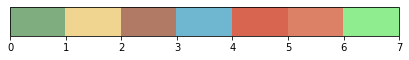

In [7]:
show_color_bar(get_slicer_cmap())

slice:  150


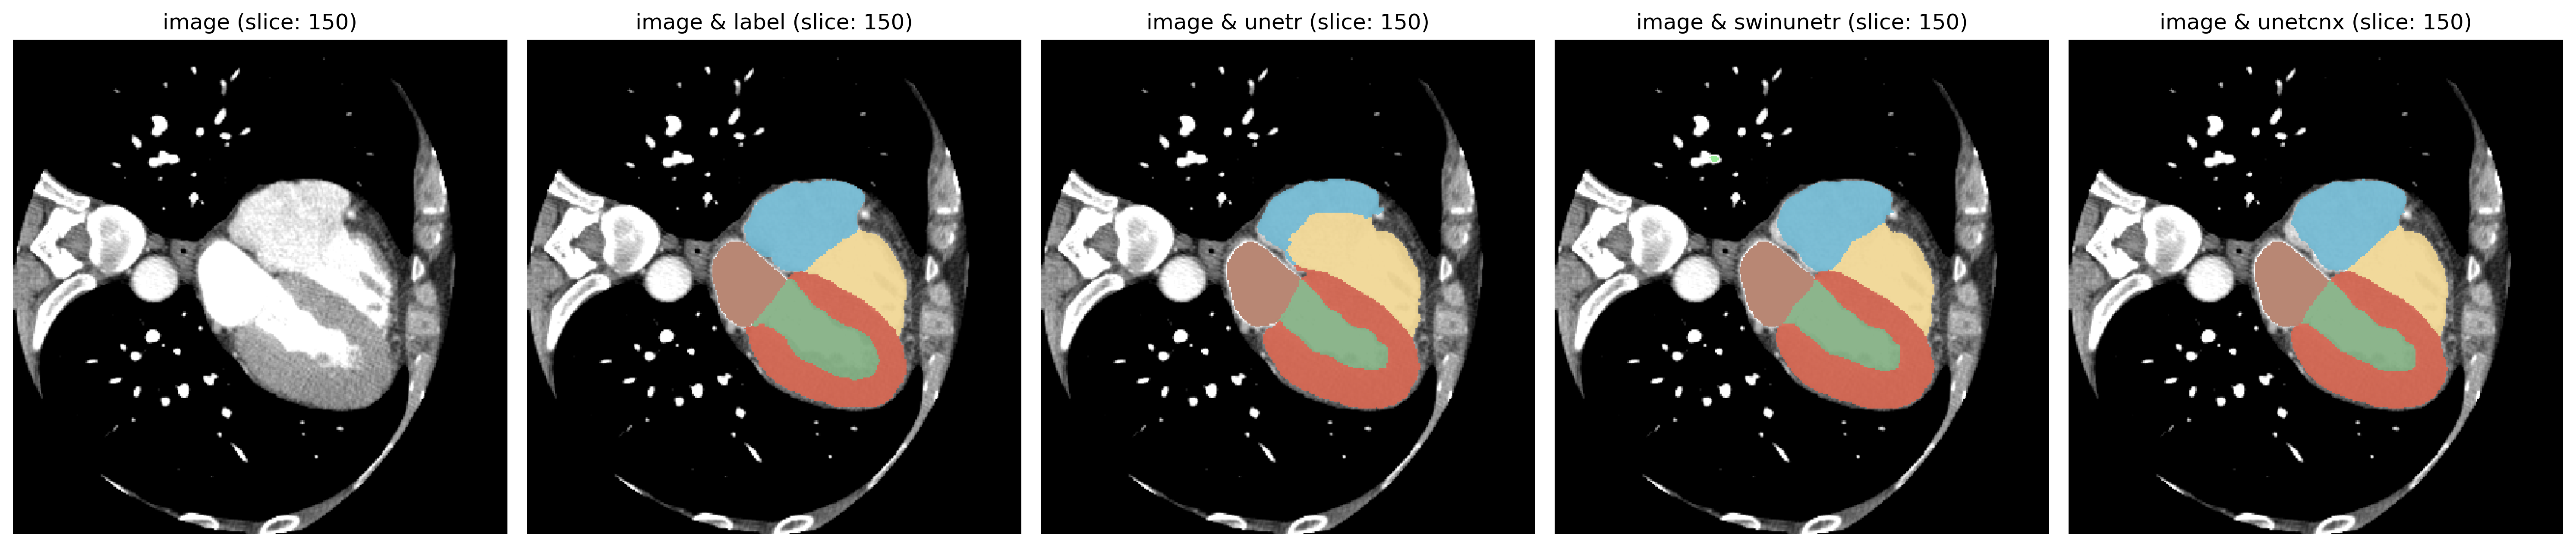

slice:  180


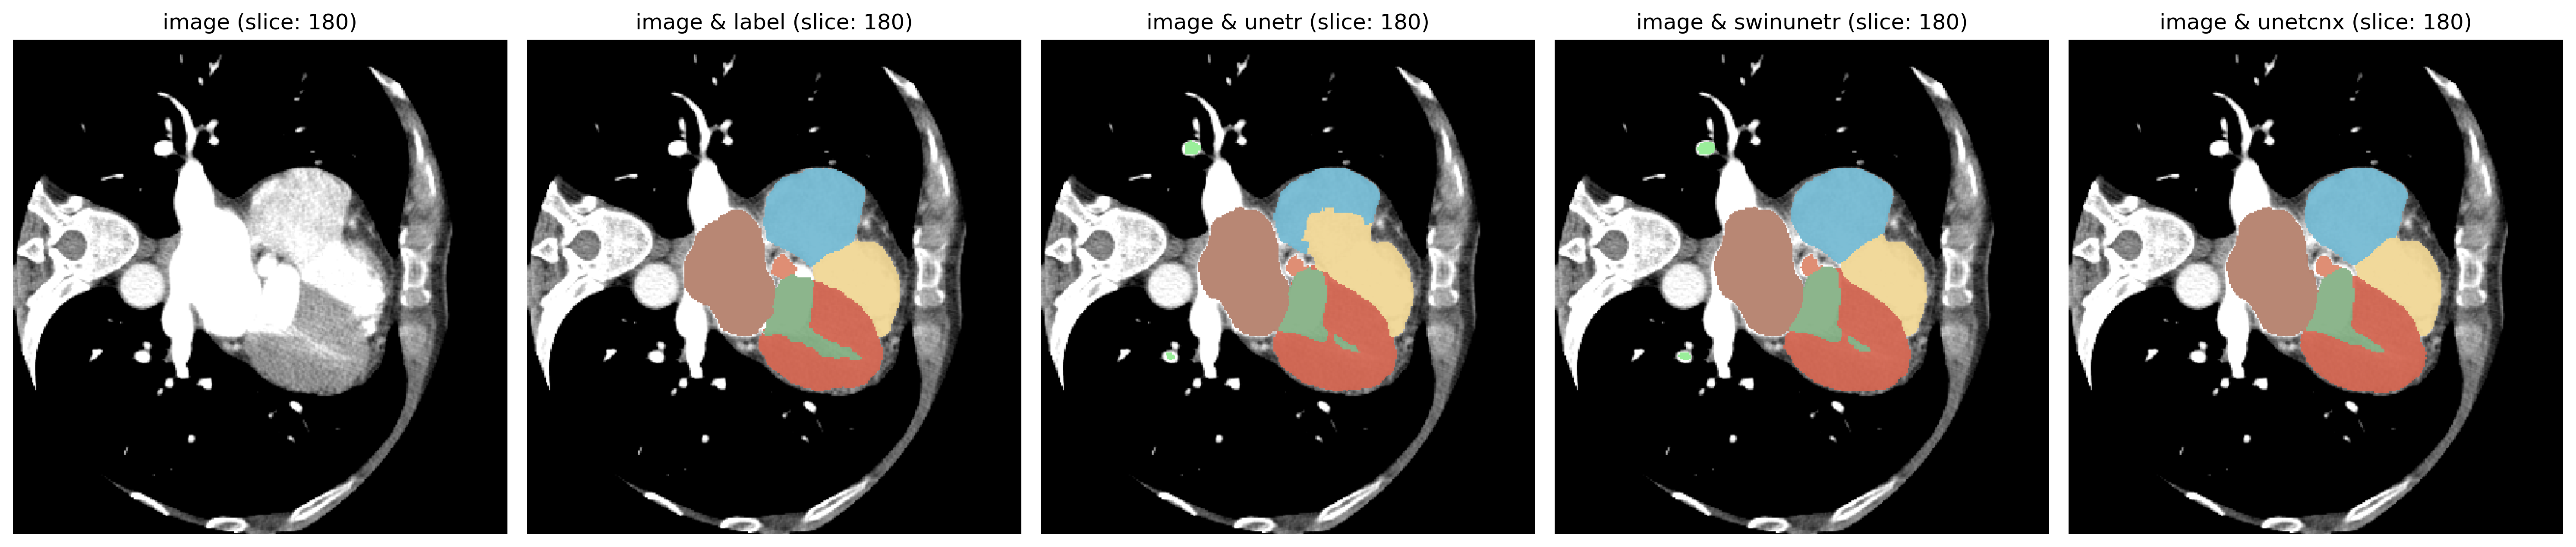

slice:  210


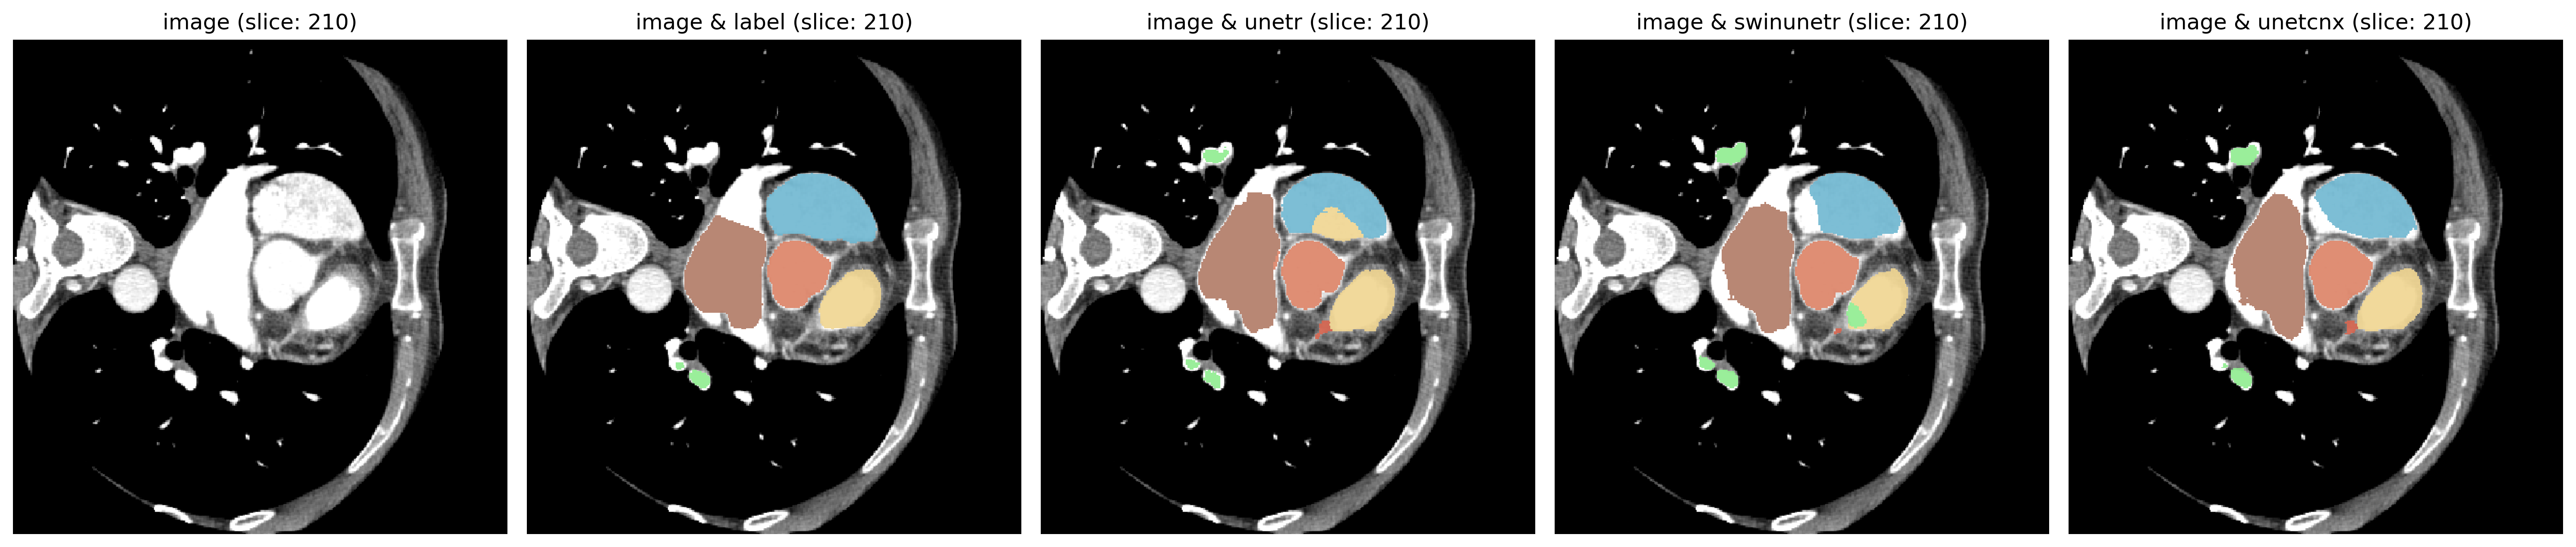

In [9]:
slice_idxs = [150, 180, 210]
for slice_idx in slice_idxs:
  print('slice: ', slice_idx)
  show_img(
      get_slice(img, slice_idx), 
      get_slice(lbl, slice_idx),
      get_slice(unetr_pred, slice_idx),
      get_slice(swinunetr_pred, slice_idx),
      get_slice(unetcnx_pred, slice_idx),
      slice_idx
  )